In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("/PYTHON/bank.csv")

In [3]:
df.shape

(11162, 17)

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        11162 non-null  int64
 1   job        11162 non-null  int64
 2   marital    11162 non-null  int64
 3   education  11162 non-null  int64
 4   default    11162 non-null  int64
 5   balance    11162 non-null  int64
 6   housing    11162 non-null  int64
 7   loan       11162 non-null  int64
 8   contact    11162 non-null  int64
 9   day        11162 non-null  int64
 10  month      11162 non-null  int64
 11  duration   11162 non-null  int64
 12  campaign   11162 non-null  int64
 13  pdays      11162 non-null  int64
 14  previous   11162 non-null  int64
 15  poutcome   11162 non-null  int64
 16  deposit    11162 non-null  int64
dtypes: int64(17)
memory usage: 1.4 MB


In [6]:
df_cat = df.drop(["age","balance","duration","campaign","pdays","previous"],axis=1)
df_num = df[["age","balance","duration","campaign","pdays","previous"]]

In [7]:
df_num.describe()

,age,balance,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,3881.000000,63.000000,854.000000,58.000000


# Skewness

age : 0.8626636888266407


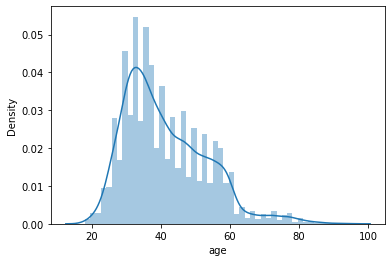

balance : 8.223513810011928


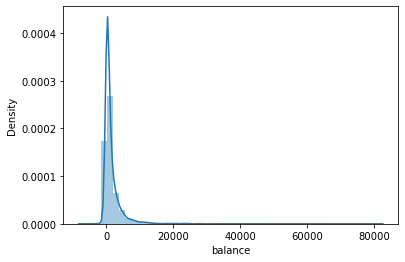

duration : 2.1434064798758583


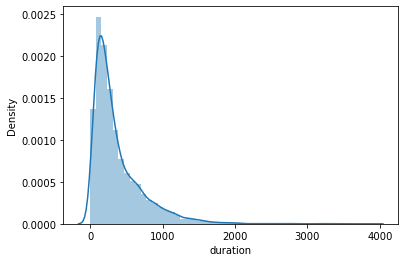

campaign : 5.5448331721137


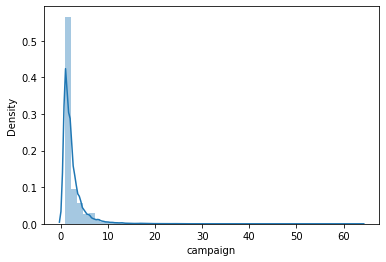

pdays : 2.449656381764196


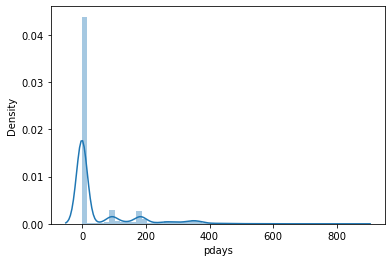

previous : 7.334312390838451


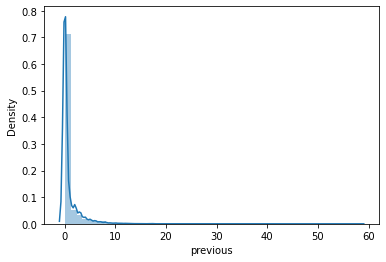

In [8]:
from scipy.stats import skew
for col in df_num:
  print(col,":",skew(df_num[col]))
  plt.figure()
  sns.distplot(df_num[col])
  plt.show()

# Visualization For Catagorical DATA

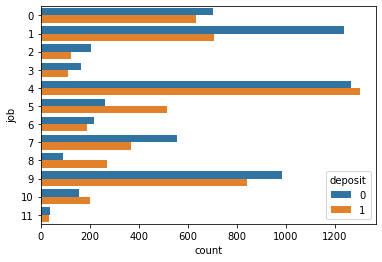

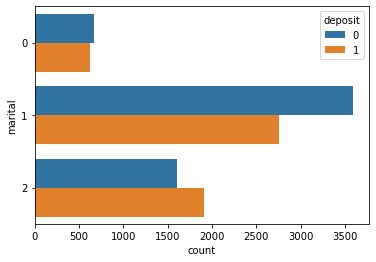

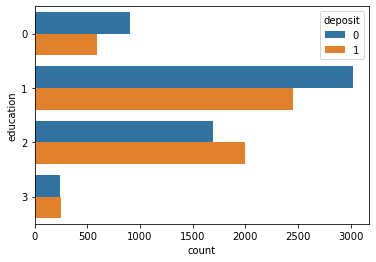

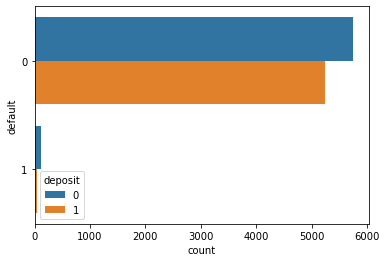

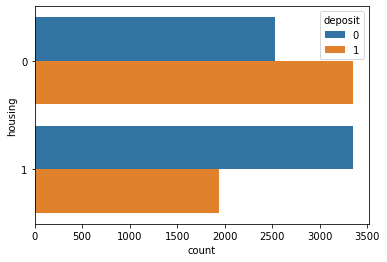

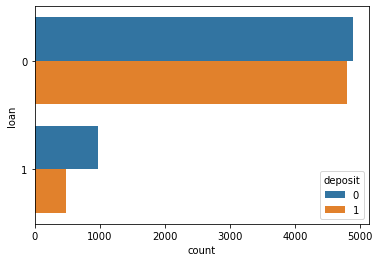

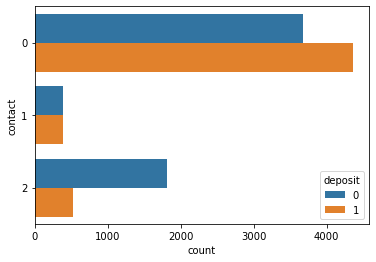

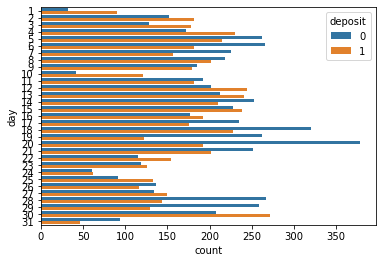

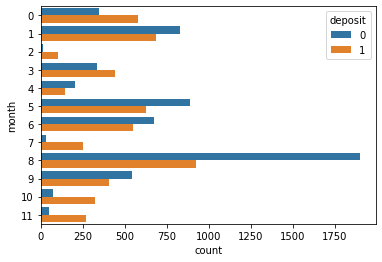

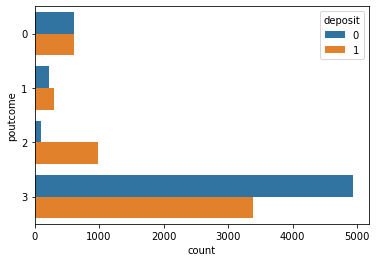

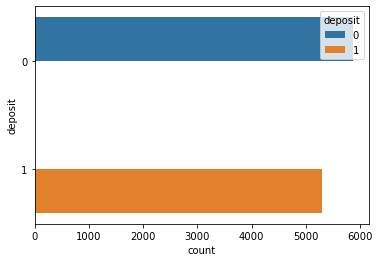

In [9]:
for col in df_cat:
  plt.figure()
  sns.countplot(data=df_cat,y=col,hue="deposit")
  plt.show()

# Training Model

In [10]:
X = df.drop("deposit",axis=1)
y = df["deposit"]

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [12]:
def train_model(model): 
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  print(classification_report(y_pred,y_test))
  return model

In [13]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

In [14]:
dt = DecisionTreeClassifier()

In [15]:
model = train_model(dt)

              precision    recall  f1-score   support

           0       0.81      0.80      0.81      1782
           1       0.78      0.79      0.78      1567

    accuracy                           0.80      3349
   macro avg       0.79      0.79      0.79      3349
weighted avg       0.80      0.80      0.80      3349



In [16]:
model.score(X_train,y_train)

1.0

In [17]:
#Decision Tree with Entropy

In [18]:
dt2 = DecisionTreeClassifier(criterion="entropy")
model2 = train_model(dt2)

              precision    recall  f1-score   support

           0       0.82      0.78      0.80      1850
           1       0.75      0.79      0.77      1499

    accuracy                           0.79      3349
   macro avg       0.78      0.79      0.79      3349
weighted avg       0.79      0.79      0.79      3349



In [19]:
model.get_depth()

25

In [20]:
model2.get_depth()

37

In [21]:
# Decision Tree Pruning Technique

In [22]:
dt3 = DecisionTreeClassifier(max_depth=10)
model3 = train_model(dt3)

              precision    recall  f1-score   support

           0       0.83      0.82      0.83      1767
           1       0.80      0.81      0.81      1582

    accuracy                           0.82      3349
   macro avg       0.82      0.82      0.82      3349
weighted avg       0.82      0.82      0.82      3349



In [23]:
model3.score(X_train,y_train)

0.8995264303084602

In [24]:
#Decision Tree with min sample leaf

In [25]:
dt4 = DecisionTreeClassifier(min_samples_leaf=50)
model4 = train_model(dt4)

              precision    recall  f1-score   support

           0       0.78      0.87      0.82      1582
           1       0.87      0.78      0.83      1767

    accuracy                           0.83      3349
   macro avg       0.83      0.83      0.83      3349
weighted avg       0.83      0.83      0.83      3349



In [26]:
#Decision Tree Combine Score

In [27]:
dt5 = DecisionTreeClassifier(max_depth=10,min_samples_leaf=20)
model5 = train_model(dt5)

              precision    recall  f1-score   support

           0       0.83      0.84      0.83      1725
           1       0.83      0.81      0.82      1624

    accuracy                           0.83      3349
   macro avg       0.83      0.83      0.83      3349
weighted avg       0.83      0.83      0.83      3349



In [28]:
#Random Forest Classifier

In [29]:
from sklearn.ensemble import RandomForestRegressor

In [30]:
rf = RandomForestRegressor(n_estimators=15,random_state=1,max_features=12)

In [31]:
rf.fit(X_train,y_train)

RandomForestRegressor(max_features=12, n_estimators=15, random_state=1)

In [32]:
y_pred = rf.predict(X_test)

In [33]:
rf.score(X_test,y_test)

0.5187559531755566